In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
from joblib import load
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from pydlts.fsmodels import SklMultiExpFrequencyScan

from pydlts.fsplots import plot_model

%matplotlib inline

In [3]:
DATASETS_PATH = '../../../datasets/'
PLOTS_PATH = '../../../plots/'
MODELS_PATH = 'saved_models/'

file_names = listdir(DATASETS_PATH)

u1 = -4
ur = -5

data_frames = [[file_name, pd.read_csv(DATASETS_PATH + file_name, parse_dates=[0])] for file_name in file_names]

condition = lambda frame: frame.loc[0, 'u1']==u1 and frame.loc[0, 'ur']==ur
data_frames = [[name, frame] for [name, frame] in data_frames if condition(frame)]

key_func = lambda x: x[1].temperature_k.iloc[0]
data_frames.sort(key=key_func)

for i, item in enumerate(data_frames):
    print(f'{i}.', item[0])

0. 1564ЛЕ1№1_п1_2500Гц-1Гц_1пФ_-10С_-4В-5В_10мВ_10мкс_шаг_0,01.csv
1. 1564ЛЕ1№1_п1_2500Гц-1Гц_1пФ_+10С_-4В-5В_50мВ_10мкс_шаг_0,01.csv
2. 1564ЛЕ1№1_п1_2500Гц-1Гц_10пФ_+30С_-4В-5В_50мВ_10мкс_шаг_0,1.csv


In [4]:
def get_X_y(dataset):
    filling_pulse = dataset.f_pulse[0] * 10 ** -6
    
    df = dataset.sample(frac=1, random_state=42)
    
    X_train = np.log10(df.frequency_hz.to_numpy())
    y_train = df.dlts_pf.to_numpy()
    
    return filling_pulse, X_train, y_train

Загружаем модель для 263 К

In [5]:
filling_pulse, X_train, y_train = get_X_y(data_frames[0][1])
mean_temp_263 = data_frames[0][1].temperature_k.mean()

Идентификация модели для 263 К

In [6]:
model_263K_6_exp = SklMultiExpFrequencyScan(filling_pulse=filling_pulse,
                                            n_exps=6,
                                            learning_rate = 0.05,
                                            stop_val = 10**-6,
                                           )

model_263K_6_exp.fit(X_train, y_train)
model_263K_6_exp.fit_results_.tail()

2022-10-14 16:20:24.398258: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-10-14 16:20:24.398285: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: aleksei-MS-7C80
2022-10-14 16:20:24.398291: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: aleksei-MS-7C80
2022-10-14 16:20:24.398395: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.76.0
2022-10-14 16:20:24.398412: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2022-10-14 16:20:24.398417: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 515.65.1 does not match DSO version 515.76.0 -- cannot find working devices in this configuration
2022-10-14 16:20:24.398723: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with on

,amplitude_0,amplitude_1,amplitude_2,amplitude_3,amplitude_4,amplitude_5,filling_pulse,learning_rate,loss,n_exps,n_iters,stop_val,time_constant_pow_0,time_constant_pow_1,time_constant_pow_2,time_constant_pow_3,time_constant_pow_4,time_constant_pow_5,verbose
873,0.000181,-0.000299,-0.000144,-0.000199,0.000222,0.000357,0.00001,0.05,1.714390e-08,6,1000,0.000001,-2.790536,-0.564111,-1.756228,-1.374335,-3.403351,-3.914939,False
874,0.000181,-0.000299,-0.000144,-0.000199,0.000222,0.000357,0.00001,0.05,1.714382e-08,6,1000,0.000001,-2.790593,-0.564135,-1.756190,-1.374393,-3.403378,-3.915053,False
875,0.000181,-0.000299,-0.000144,-0.000199,0.000222,0.000357,0.00001,0.05,1.714374e-08,6,1000,0.000001,-2.790650,-0.564160,-1.756152,-1.374452,-3.403405,-3.915167,False
876,0.000181,-0.000299,-0.000144,-0.000199,0.000222,0.000357,0.00001,0.05,1.714366e-08,6,1000,0.000001,-2.790707,-0.564184,-1.756114,-1.374511,-3.403431,-3.915281,False
877,0.000181,-0.000299,-0.000144,-0.000199,0.000222,0.000357,0.00001,0.05,1.714358e-08,6,1000,0.000001,-2.790764,-0.564209,-1.756076,-1.374569,-3.403458,-3.915395,False


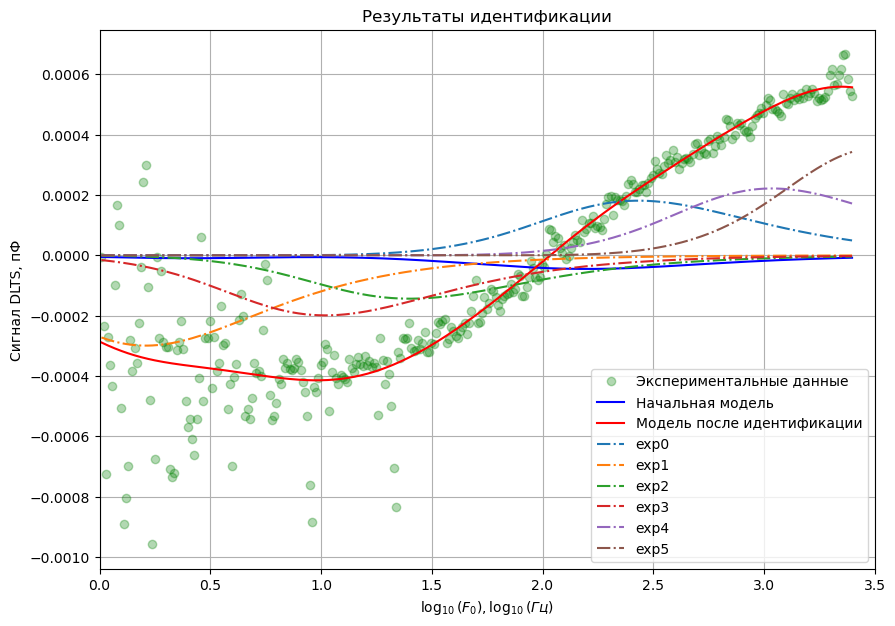

In [7]:
fig, ax = plot_model(X_train, y_train, SklMultiExpFrequencyScan, model_263K_6_exp.fit_results_)
ax.set_ylabel('Сигнал DLTS, пФ')
plt.show()

Загружаем модель для 283 К

In [8]:
filling_pulse, X_train, y_train = get_X_y(data_frames[1][1])
mean_temp_263 = data_frames[1][1].temperature_k.mean()

In [9]:
model_283K_6_exp = SklMultiExpFrequencyScan(filling_pulse=filling_pulse,
                                            n_exps=6,
                                            learning_rate = 0.05,
                                            stop_val = 10**-6,
                                           )

model_283K_6_exp.fit(X_train, y_train)

model_283K_6_exp.fit_results_.tail()

,amplitude_0,amplitude_1,amplitude_2,amplitude_3,amplitude_4,amplitude_5,filling_pulse,learning_rate,loss,n_exps,n_iters,stop_val,time_constant_pow_0,time_constant_pow_1,time_constant_pow_2,time_constant_pow_3,time_constant_pow_4,time_constant_pow_5,verbose
995,0.001512,0.001528,0.001271,0.00124,0.001149,0.001275,0.00001,0.05,2.192461e-08,6,1000,0.000001,-0.603542,-2.537737,-0.794206,-1.870955,-3.558871,-1.402094,False
996,0.001512,0.001528,0.001270,0.00124,0.001149,0.001275,0.00001,0.05,2.192281e-08,6,1000,0.000001,-0.603479,-2.537845,-0.794236,-1.870990,-3.559022,-1.402090,False
997,0.001512,0.001528,0.001270,0.00124,0.001149,0.001275,0.00001,0.05,2.192102e-08,6,1000,0.000001,-0.603416,-2.537952,-0.794265,-1.871024,-3.559172,-1.402086,False
998,0.001512,0.001528,0.001270,0.00124,0.001149,0.001275,0.00001,0.05,2.191924e-08,6,1000,0.000001,-0.603354,-2.538060,-0.794295,-1.871058,-3.559322,-1.402081,False
999,0.001512,0.001528,0.001270,0.00124,0.001149,0.001275,0.00001,0.05,2.191746e-08,6,1000,0.000001,-0.603291,-2.538167,-0.794324,-1.871092,-3.559472,-1.402077,False


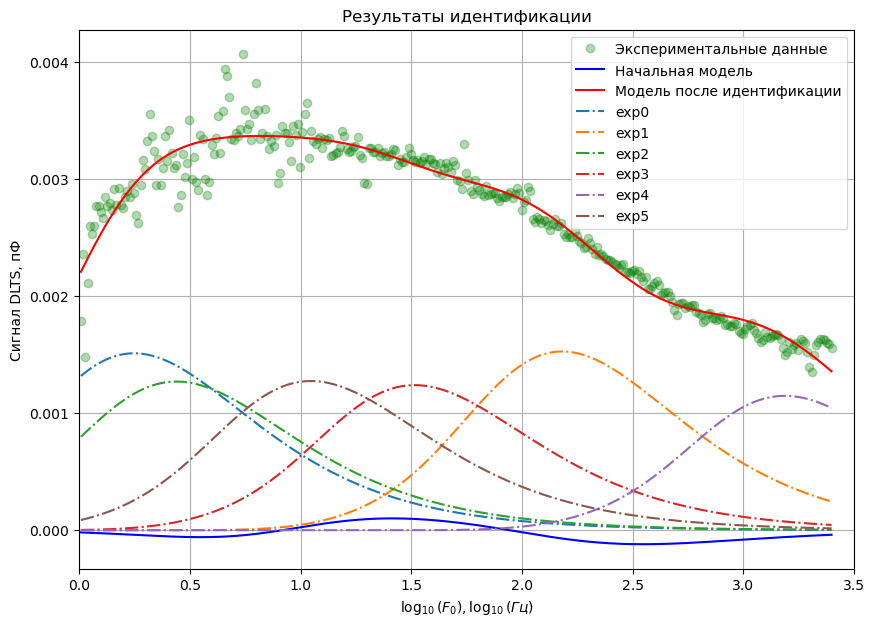

In [10]:
fig, ax = plot_model(X_train, y_train, SklMultiExpFrequencyScan, model_283K_6_exp.fit_results_)
ax.set_ylabel('Сигнал DLTS, пФ')
plt.show()

Загружаем модель для 303 К

In [11]:
filling_pulse, X_train, y_train = get_X_y(data_frames[1][1])
mean_temp_263 = data_frames[2][1].temperature_k.mean()

In [ ]:
model_303K_6_exp = SklMultiExpFrequencyScan(filling_pulse=filling_pulse,
                                            n_exps=6,
                                            learning_rate = 0.05,
                                            stop_val = 10**-6,
                                           )

model_303K_6_exp.fit(X_train, y_train)

model_303K_6_exp.fit_results_.tail()

In [ ]:
fig, ax = plot_model(X_train, y_train, SklMultiExpFrequencyScan, model_303K_6_exp.fit_results_)
ax.set_ylabel('Сигнал DLTS, пФ')
plt.show()